# WeatherPy
----
### Observing Weather Conditions Near the Equator
As expected, temperature increased as one nears the equator.  This mostly due to Earth's rotation causing a bulge towards the middle, thereby being closer to the Sun.  But since the equator is an imaginary line, the "real" equator, i.e., where it's hottest, is between 0° and 20°.

The other observed weather patterns (humidity, cloudiness, wind speed) do not appear to be affected by proximity to the equator.  Even when the results were split between the hemispheres, there was no significant difference that would suggest correlation.

The limitations of the other data is they do not account for historical weather data - only current data.  Weather patterns are complex and cyclical.  If the observed data doesn't reflect different seasons, one might reach the wrong conclusions, especially regarding humidity, cloudiness, and wind speed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Empty lists for dataframe 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#counter for print log
record = 1
of = 1

# Log file print statement
print(f"Beginning data retrieval.")
print("-"*64)

#Loop through the cities in the city list 
for city in cities:  
    
    try: 
        response = requests.get(f"{base_url}appid={weather_api_key}&q={city}&units=imperial").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} of Set {of} | {city_record}") 
        
    except:
        print("City not found. Skipping...")
        
        record = record-1
    
    if record <50:
        record= record + 1
    else:
        record = 1
        of += 1
    
    print("-"*64)

print(f"End of data retrieval.")

Beginning data retrieval.
----------------------------------------------------------------
Processing Record 1 of Set 1 | Padang
----------------------------------------------------------------
Processing Record 2 of Set 1 | San Francisco del Mar Viejo
----------------------------------------------------------------
Processing Record 3 of Set 1 | Hermanus
----------------------------------------------------------------
Processing Record 4 of Set 1 | Katsuura
----------------------------------------------------------------
Processing Record 5 of Set 1 | Atuona
----------------------------------------------------------------
Processing Record 6 of Set 1 | Leningradskiy
----------------------------------------------------------------
Processing Record 7 of Set 1 | Pierre
----------------------------------------------------------------
Processing Record 8 of Set 1 | Kapaa
----------------------------------------------------------------
Processing Record 9 of Set 1 | Qaanaaq
---------------

Processing Record 20 of Set 2 | Santa Elena
----------------------------------------------------------------
Processing Record 21 of Set 2 | Aitape
----------------------------------------------------------------
Processing Record 22 of Set 2 | Dimbokro
----------------------------------------------------------------
Processing Record 23 of Set 2 | Arraial do Cabo
----------------------------------------------------------------
Processing Record 24 of Set 2 | Atherton
----------------------------------------------------------------
Processing Record 25 of Set 2 | Port-Gentil
----------------------------------------------------------------
Processing Record 26 of Set 2 | Mandalgovi
----------------------------------------------------------------
Processing Record 27 of Set 2 | Yar-Sale
----------------------------------------------------------------
Processing Record 28 of Set 2 | Mar del Plata
----------------------------------------------------------------
Processing Record 29 of Set 

Processing Record 44 of Set 3 | Dingle
----------------------------------------------------------------
Processing Record 45 of Set 3 | Hervey Bay
----------------------------------------------------------------
Processing Record 46 of Set 3 | Myaundzha
----------------------------------------------------------------
Processing Record 47 of Set 3 | Saint-Paul-lès-Dax
----------------------------------------------------------------
Processing Record 48 of Set 3 | Bow Island
----------------------------------------------------------------
Processing Record 49 of Set 3 | Port Blair
----------------------------------------------------------------
Processing Record 50 of Set 3 | Along
----------------------------------------------------------------
Processing Record 1 of Set 4 | Lianran
----------------------------------------------------------------
Processing Record 2 of Set 4 | Alanya
----------------------------------------------------------------
Processing Record 3 of Set 4 | Thompson

Processing Record 16 of Set 5 | Mirny
----------------------------------------------------------------
Processing Record 17 of Set 5 | Mizdah
----------------------------------------------------------------
Processing Record 18 of Set 5 | Shelburne
----------------------------------------------------------------
Processing Record 19 of Set 5 | Podor
----------------------------------------------------------------
Processing Record 20 of Set 5 | Tulun
----------------------------------------------------------------
Processing Record 21 of Set 5 | Plácido de Castro
----------------------------------------------------------------
Processing Record 22 of Set 5 | Brownsville
----------------------------------------------------------------
Processing Record 23 of Set 5 | Dengzhou
----------------------------------------------------------------
Processing Record 24 of Set 5 | Caravelas
----------------------------------------------------------------
Processing Record 25 of Set 5 | Denpasar
--

Processing Record 38 of Set 6 | Lithakia
----------------------------------------------------------------
Processing Record 39 of Set 6 | Mayo
----------------------------------------------------------------
Processing Record 40 of Set 6 | Moorhead
----------------------------------------------------------------
Processing Record 41 of Set 6 | Dali
----------------------------------------------------------------
Processing Record 42 of Set 6 | That Phanom
----------------------------------------------------------------
Processing Record 43 of Set 6 | Amlapura
----------------------------------------------------------------
Processing Record 44 of Set 6 | Tautira
----------------------------------------------------------------
Processing Record 45 of Set 6 | Fortuna
----------------------------------------------------------------
Processing Record 46 of Set 6 | Mount Isa
----------------------------------------------------------------
Processing Record 47 of Set 6 | Bosaso
-------------

Processing Record 10 of Set 8 | Solnechnyy
----------------------------------------------------------------
Processing Record 11 of Set 8 | Havøysund
----------------------------------------------------------------
Processing Record 12 of Set 8 | Tuatapere
----------------------------------------------------------------
Processing Record 13 of Set 8 | Redlands
----------------------------------------------------------------
City not found. Skipping...
----------------------------------------------------------------
Processing Record 14 of Set 8 | Mahibadhoo
----------------------------------------------------------------
Processing Record 15 of Set 8 | Westport
----------------------------------------------------------------
Processing Record 16 of Set 8 | Berlevåg
----------------------------------------------------------------
Processing Record 17 of Set 8 | Imbituba
----------------------------------------------------------------
Processing Record 18 of Set 8 | Benghazi
------------

Processing Record 34 of Set 9 | Shuyskoye
----------------------------------------------------------------
Processing Record 35 of Set 9 | Bairiki Village
----------------------------------------------------------------
Processing Record 36 of Set 9 | Husum
----------------------------------------------------------------
Processing Record 37 of Set 9 | Whitehorse
----------------------------------------------------------------
Processing Record 38 of Set 9 | Cockburn Town
----------------------------------------------------------------
Processing Record 39 of Set 9 | Pacific Grove
----------------------------------------------------------------
Processing Record 40 of Set 9 | Coyhaique
----------------------------------------------------------------
Processing Record 41 of Set 9 | Hauterive
----------------------------------------------------------------
Processing Record 42 of Set 9 | Bagotville
----------------------------------------------------------------
Processing Record 43 of S

Processing Record 9 of Set 11 | Custoias
----------------------------------------------------------------
Processing Record 10 of Set 11 | Warmbad
----------------------------------------------------------------
Processing Record 11 of Set 11 | Makakilo City
----------------------------------------------------------------
Processing Record 12 of Set 11 | San Cristobal
----------------------------------------------------------------
Processing Record 13 of Set 11 | Cañaveral
----------------------------------------------------------------
Processing Record 14 of Set 11 | Egvekinot
----------------------------------------------------------------
Processing Record 15 of Set 11 | Dhidhdhoo
----------------------------------------------------------------
Processing Record 16 of Set 11 | Port Augusta
----------------------------------------------------------------
Processing Record 17 of Set 11 | Okha
----------------------------------------------------------------
Processing Record 18 of Se

Processing Record 30 of Set 12 | Alyangula
----------------------------------------------------------------
End of data retrieval.


In [4]:
# put lists into dictionary
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = pd.DataFrame(weather_dict)

# Save data frame to CSV
weather_data.to_csv(output_data_file)


# check if each column has the same count
print(weather_data.count())

weather_data.head()

City          580
Cloudiness    580
Country       580
Date          580
Humidity      580
Lat           580
Lng           580
Max Temp      580
Wind Speed    580
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Padang,75,ID,1630195119,85,-0.9492,100.3543,73.45,3.09
1,San Francisco del Mar Viejo,83,MX,1630195214,70,16.2333,-94.6500,84.15,5.32
2,Hermanus,40,ZA,1630195215,69,-34.4187,19.2345,45.90,5.88
3,Katsuura,6,JP,1630195215,79,35.1333,140.3000,84.31,14.41
4,Atuona,27,PF,1630194933,75,-9.8000,-139.0333,78.12,23.17


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#no countries with more than 100% humidity
humid_drop = weather_data.loc[weather_data["Humidity"]>100]
humid_drop

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [7]:
# Get the indices of cities that have humidity over 100%.
#If there are, make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

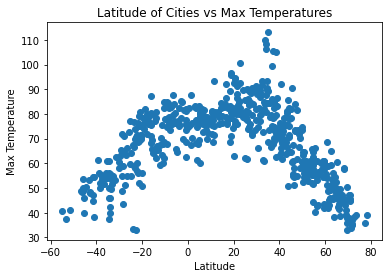

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude of Cities vs Max Temperatures")
plt.savefig('output_data/plot_temp.png', dpi=300, bbox_inches='tight')
plt.show()

#### Max Temperature Analysis
This scatter plot clearly shows a relationship between temperature and the equator.  As we approach 20 degrees latitude, (probably due to earth's imperfect spherical shape; it bulges at the center), the max temperature increases.  The inverse is also true.

## Latitude vs. Humidity Plot

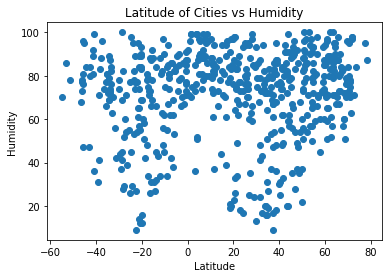

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude of Cities vs Humidity")
plt.savefig('output_data/plot_humid.png', dpi=300, bbox_inches='tight')
plt.show()

#### Humidity Analysis
There is some correlation with humidity related to latitude, as there are fewer data points below ~65 % humidity from 0 to 20 degrees latitude, i.e., the equator.

## Latitude vs. Cloudiness Plot

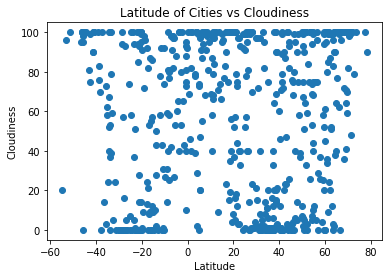

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude of Cities vs Cloudiness")
plt.savefig('output_data/plot_cloud.png', dpi=300, bbox_inches='tight')
plt.show()

#### Cloudiness Analysis
There doesn't appear to be any relationship between cloudiness and north/south location, as there are clusters of cities at pertinent latitudes that have no cloudiness to 100 % cloud coverage.

## Latitude vs. Wind Speed Plot

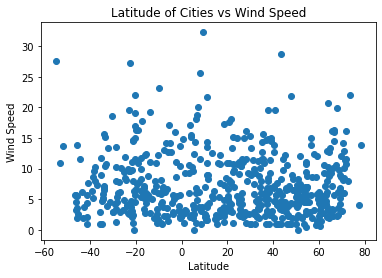

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude of Cities vs Wind Speed")
plt.savefig('output_data/plot_wind.png', dpi=300, bbox_inches='tight')
plt.show()

#### Wind Speed Analysis
Again, there appears to be little correlation, as there are ranges of wind speeds regardless of latitude.  The cluster of data points at the bottom only indicates the low relative wind speed for most cities.

## Linear Regression

In [18]:
north_h = weather_data.loc[weather_data["Lat"]>=0]
south_h = weather_data.loc[weather_data["Lat"]<0]

In [19]:
#define function to generate each line regression
def line_reg(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.7441513680847115


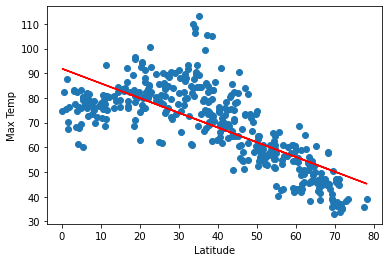

In [20]:
x= north_h["Lat"]
y=north_h["Max Temp"]
line_reg(x, y, "Max Temp")

#### Northern Hemisphere Max Temp Analysis
There is a strong negative correlation between cities in the northern hemisphere and max temperature as they approach the equator, shown by the negative .74 r-squared value.  The graph, as read left to right, shows that as one gets farther from the equator, the max temperature for the cities decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.7800667001314878


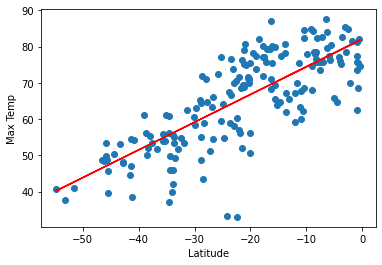

In [21]:
x= south_h["Lat"]
y=south_h["Max Temp"]
line_reg(x, y, "Max Temp")

##### Southern Hemisphere Max Temp Analysis
There is a strong positive correlation between cities in the southern hemisphere and max temperature as they approach the equator, shown by the positive .78 r-squared value.  The graph, as read left to right, shows that as one gets closer to the equator, the max temperature for the cities increases.  

Perhaps the stronger r-squared value is due to the tilt of the earth on its axis.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.021659399060429185


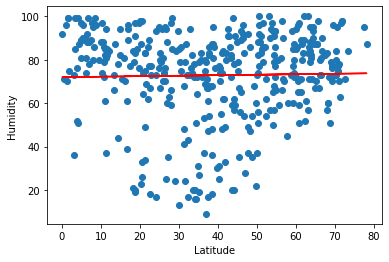

In [22]:
x= north_h["Lat"]
y=north_h["Humidity"]
line_reg(x, y, "Humidity")

##### Northern Hemisphere Humidity Analysis
There is a very weak positive correlation between cities in the northern hemisphere and humidity as they leave the equator, shown by the positive .02 r-squared value.  The graph indicates that one hardly experiences an increase in humidity as they leave the equator.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: -0.014886281661516895


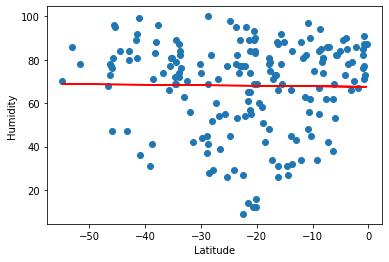

In [23]:
x= south_h["Lat"]
y=south_h["Humidity"]
line_reg(x, y, "Humidity")

##### Southern Hemisphere Humidity Analysis
There is a very weak negative correlation between cities in the southern hemisphere and humidity as they approach the equator, shown by the negative  
.01 r-squared value.  The graph indicates that one hardly experiences a decrease in humidity as they approach the equator.  

Perhaps the differences in the two hemispheres is due to cyclical weather patterns that oscillate between the two.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.00952127926989572


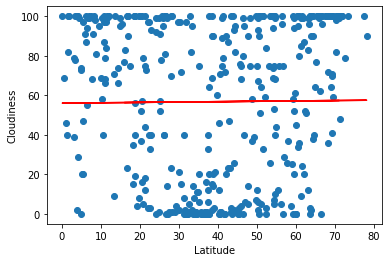

In [24]:
x= north_h["Lat"]
y=north_h["Cloudiness"]
line_reg(x, y, "Cloudiness")

##### Northern Hemisphere Cloudiness Analysis
There is an extremely weak positive correlation between cities in the northern hemisphere and cloudiness as they leave the equator, shown by the positive .009 r-squared value.  The graph indicates that one hardly experiences an increase in cloudiness as they leave the equator.  

Perhaps the differences in the two hemispheres is due to cyclical weather patterns that oscillate between the two.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: -0.0716492512980595


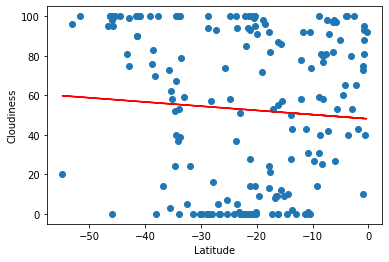

In [25]:
x= south_h["Lat"]
y=south_h["Cloudiness"]
line_reg(x, y, "Cloudiness")

##### Southern Hemisphere Cloudiness Analysis
There is an extremely weak negative correlation between cities in the southern hemisphere and cloudiness as they approach the equator, shown by the negative .07 r-squared value.  The graph indicates that one experiences a negligible decrease in cloudiness as they approach the equator.  

Perhaps the differences in the two hemispheres is still due to cyclical weather patterns that oscillate between the two, since clouds can indicate weather movements and patterns.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.03321443834410738


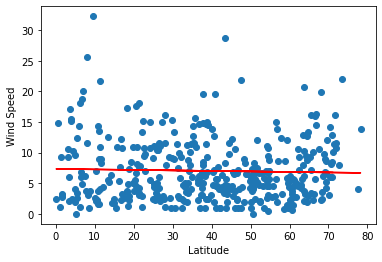

In [26]:
x= north_h["Lat"]
y=north_h["Wind Speed"]
line_reg(x, y, "Wind Speed")

#### Northern Hemisphere Wind Speed Analysis
There is an extremely negative weak correlation between cities in the northern hemisphere and wind speed as they leave the equator, shown by the negative .03 r-squared value.  The graph indicates that one experiences no real change in wind speed as they move away from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.0716492512980595


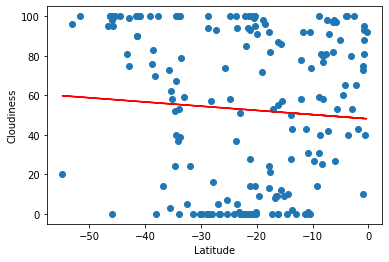

In [27]:
x= south_h["Lat"]
y=south_h["Cloudiness"]
line_reg(x, y, "Cloudiness")

#### Southern Hemisphere Wind Speed Analysis
There is an extremely weak correlation between cities in the southern hemisphere and wind speed as they approach the equator, shown by the negative .07 r-squared value.  The graph indicates that one experiences no real change in wind speed as they approach the equator.